In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/MyDrive/Crypto Market"

BinanceCoin.csv  Bitcoin.csv  Dogecoin.csv  Ethereum.csv  Litecoin.csv	Solana.csv


In [3]:
import pandas as pd
import os

# Set the path to the folder containing your CSV files
folder_path = '/content/drive/MyDrive/Crypto Market'

crypto_data = {}  # Dictionary to store data

# Load and clean data
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, parse_dates=['Date'])
        df.set_index('Date', inplace=True)
        df.dropna(inplace=True)  # Handling missing values
        crypto_data[filename[:-4]] = df


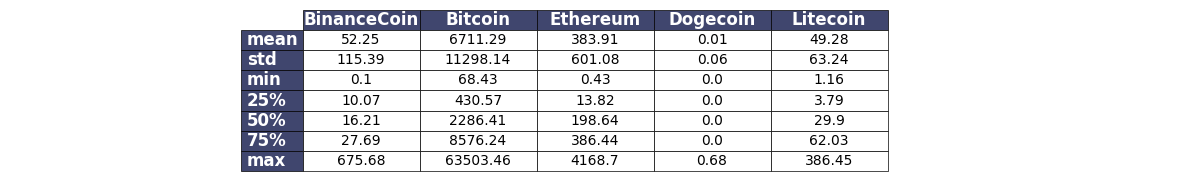

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the statistics you want to include
stats = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Collect all summaries into one DataFrame
all_summaries = pd.DataFrame()

for coin_name, df in crypto_data.items():
    # Calculate the summary statistics for the 'Close' column
    summary = df['Close'].describe().loc[stats].to_frame(coin_name).round(2)
    all_summaries = pd.concat([all_summaries, summary], axis=1)

# Plotting the summary statistics table
fig, ax = plt.subplots(figsize=(12, 2))  # Adjust the figsize to fit your data
ax.axis('off')  # Hide the axes

# Create the table
table = ax.table(cellText=all_summaries.values,
                 rowLabels=all_summaries.index,
                 colLabels=all_summaries.columns,
                 loc='center',
                 cellLoc='center',
                 colLoc='center',
                 colWidths=[0.1] * len(all_summaries.columns))  # Adjust colWidths based on your data

# Style the table with color and text size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] < 0:  # Header row or index column
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='w')

plt.tight_layout()

# Save the table as an image
plt.savefig('/content/Statistical_Anaylysis.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [8]:
import pandas as pd

# Assuming you have a dictionary with the name of the coin as the key and its DataFrame as the value
crypto_data = {} # This should be filled with your actual data

# Load and preprocess the data
for csv_file in ['BinanceCoin.csv', 'Bitcoin.csv', 'Ethereum.csv','Dogecoin.csv','Litecoin.csv' ]: # Add all your file names here
    coin_name = csv_file.replace('.csv', '')
    df = pd.read_csv(f'/content/drive/MyDrive/Crypto Market/{csv_file}')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    crypto_data[coin_name] = df


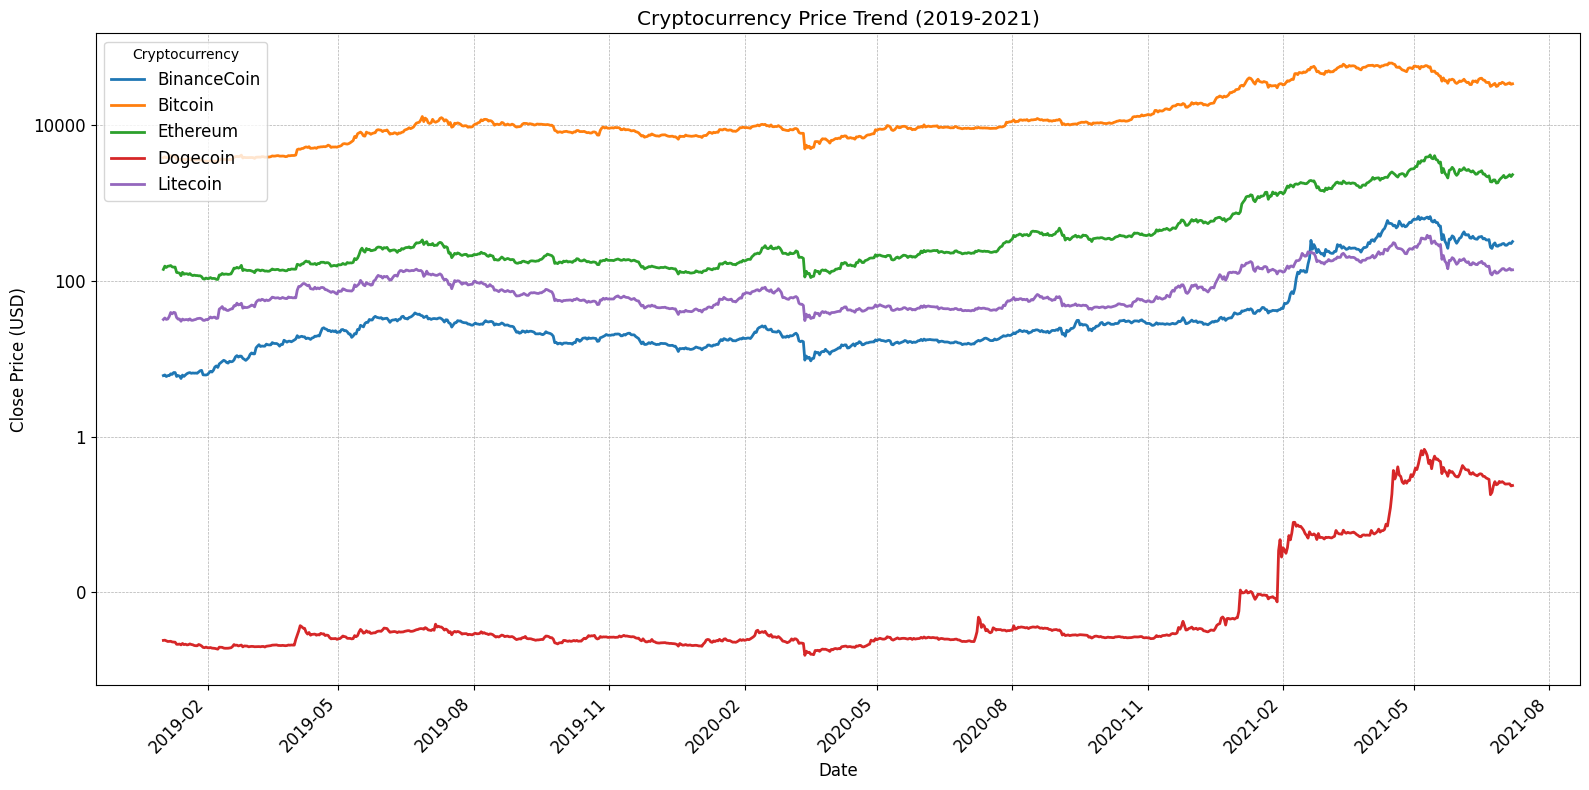

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
import pandas as pd

# Assuming `crypto_data` is your data structured properly

# Start the plot
plt.figure(figsize=(16, 8))

# Plot each cryptocurrency's closing price
for coin, df in crypto_data.items():
    # Filter data from 2019 to 2021
    df = df[(df.index >= '2019-01-01') & (df.index <= '2021-12-31')]
    plt.plot(df.index, df['Close'], label=coin, linewidth=2)

# Enhance the legend
plt.legend(title='Cryptocurrency', loc='upper left', fontsize='large')

# Enhance axes and title
plt.xlabel('Date', fontsize='large')
plt.ylabel('Close Price (USD)', fontsize='large')
plt.title('Cryptocurrency Price Trend (2019-2021)', fontsize='x-large')

# Adjust x-axis for a 3-month interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right', fontsize='large')

# Set y-axis to logarithmic scale
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.yticks(fontsize='large')

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhance overall layout
plt.tight_layout()

# Save the plot with a high resolution
plt.savefig('crypto_price_trend_2019_2021.png', dpi=300)

# Show the plot
plt.show()


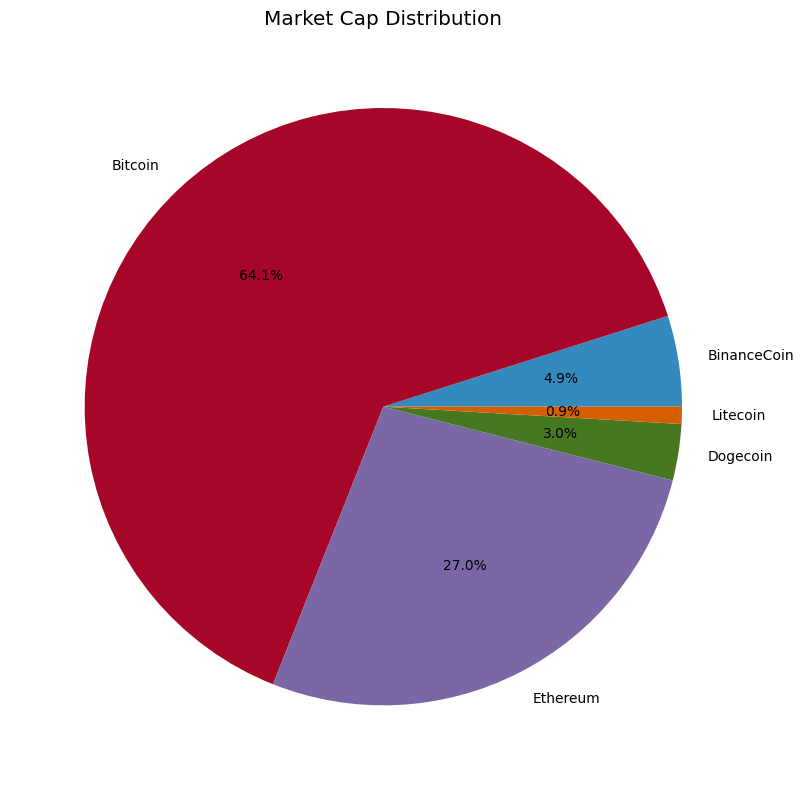

In [17]:
# Assuming you want the latest market cap data
latest_market_caps = {coin: df['Marketcap'].iloc[-1] for coin, df in crypto_data.items()}
total_market_cap = sum(latest_market_caps.values())
market_cap_shares = {coin: cap / total_market_cap for coin, cap in latest_market_caps.items()}

plt.figure(figsize=(10, 8))
plt.pie(market_cap_shares.values(), labels=market_cap_shares.keys(), autopct='%1.1f%%')
plt.title('Market Cap Distribution')
plt.tight_layout()
plt.savefig('market_cap_pie_chart.png', dpi=300)
plt.show()


In [25]:
import plotly.graph_objects as go
import pandas as pd

# Function to create a candlestick chart for a given cryptocurrency for the year 2021
def create_candlestick_chart_2021(coin_name, csv_file):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])  # Convert the Date column to datetime
    df = df[df['Date'].dt.year == 2021]  # Filter the data for the year 2021
    df.sort_values('Date', inplace=True)  # Sort the dataframe by the Date column

    # Create the candlestick chart
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                         open=df['Open'], high=df['High'],
                                         low=df['Low'], close=df['Close'],
                                         name=coin_name)])  # Add 'name' for the legend entry

    # Update the layout of the figure to add titles and make the layout professional
    fig.update_layout(
        title={
            'text': f'<b>{coin_name} Candlestick Chart (2021)</b>',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                size=18,
                color='Black'
            )},
        xaxis_title='<b>Date</b>',
        yaxis_title='<b>Price (USD)</b>',
        xaxis_rangeslider_visible=False,
        template='plotly_white',  # A simple and clean template
        margin=dict(l=20, r=20, t=40, b=20),  # Reduce default margins
        hovermode='x unified',  # Shows a tooltip with information for the hovered location
        legend=dict(
            title='<b>Legend</b>',  # Legend title
            orientation='h',  # Horizontal legend
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1,
            font=dict(
                size=14,
                color='Black'
            )
        )
    )

    # Bold the axes ticks and labels
    fig.update_xaxes(title_font=dict(size=16, color='Black', family='Arial, sans-serif'),
                     tickfont=dict(size=14, color='Black', family='Arial, sans-serif'))

    fig.update_yaxes(title_font=dict(size=16, color='Black', family='Arial, sans-serif'),
                     tickfont=dict(size=14, color='Black', family='Arial, sans-serif'))

    # Show the figure
    fig.show()

# Example usage:
# Replace 'path_to_bitcoin_csv' with the actual path to your Bitcoin data CSV file
create_candlestick_chart_2021('Bitcoin', '/content/drive/MyDrive/Crypto Market/Bitcoin.csv')
create_candlestick_chart_2021('Ethereum', '/content/drive/MyDrive/Crypto Market/Ethereum.csv')
# Repeat for Ethereum, Dogecoin, and Binance Coin with the appropriate CSV file paths


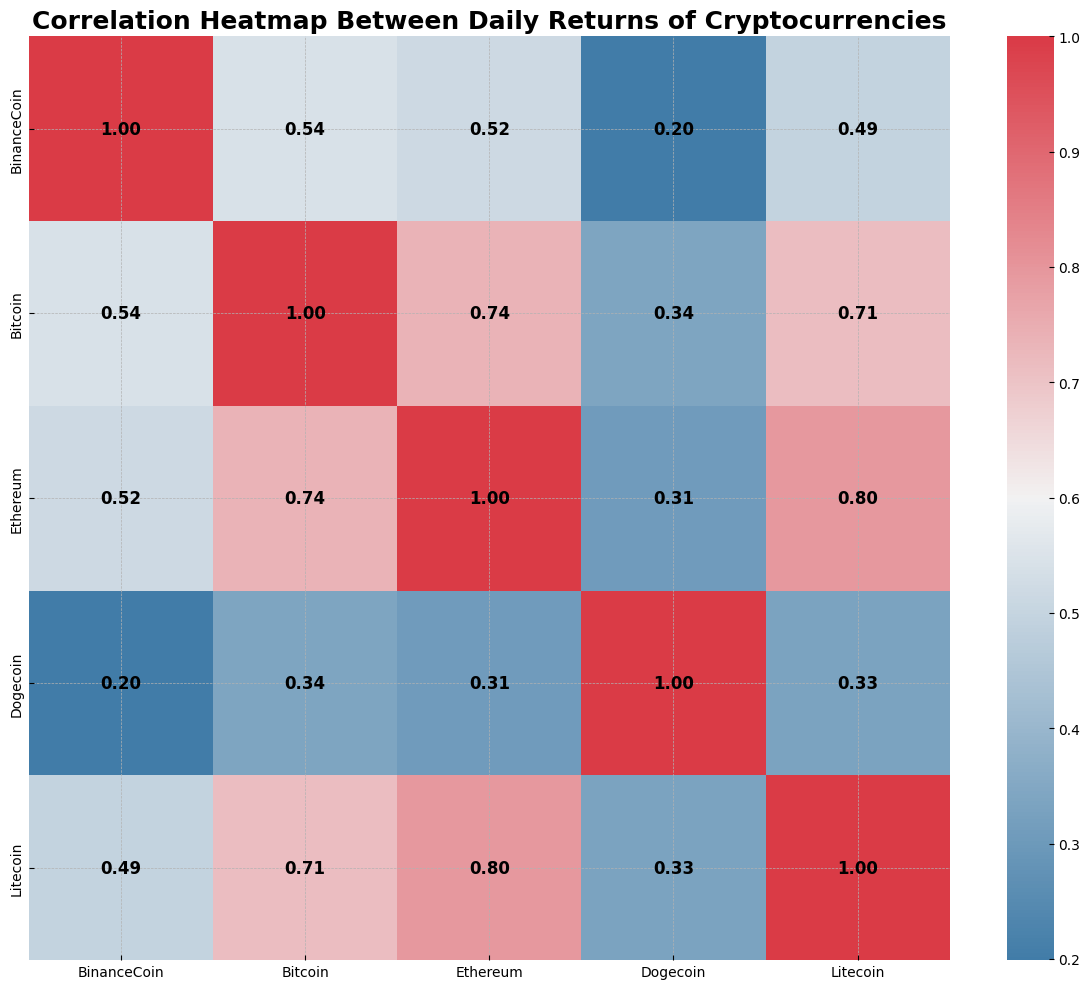

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `crypto_data` is a dictionary of dataframes with each dataframe corresponding to a cryptocurrency

# Calculate daily returns for correlation
for coin_name, df in crypto_data.items():
    df['Daily_Return'] = df['Close'].pct_change()

# Combine the daily returns into a single dataframe
combined_returns = pd.DataFrame({coin: df['Daily_Return'] for coin, df in crypto_data.items()})

# Drop any NaNs that result from the pct_change calculation
combined_returns.dropna(inplace=True)

# Calculate the correlation matrix
correlations = combined_returns.corr()

# Set the default matplotlib style sheet
plt.style.use('bmh')

# Create a more professional color palette, we'll use a blue color palette which is good for heatmaps
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create a heatmap with bold annotations and the chosen colormap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlations, annot=True, cmap=cmap, fmt=".2f",
                      annot_kws={"size": 12, "weight": "bold", "color": "black"})

# Enhance the title with a larger font size
plt.title('Correlation Heatmap Between Daily Returns of Cryptocurrencies', fontsize=18, weight='bold')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with a high resolution
plt.savefig('correlation_heatmap.png', dpi=300)

# Show the plot
plt.show()
